* L1 distance: absolute values of x and y coordinates
* L2 distance: square of distance between coordinates

MSE =  `(L2 distance / N)`

MSE distance does not account for structural similarities between images

### Structural Similarity index
    given image A and B:
    
    `SSim(A,B) = L(A,B) * C(A,B) * S(A,B)`
    
    where L = Luminance,
          C = Contrast,
          S = Structure



* SSim returns a value between -1 and 1. 
* SSim=1 means exact similarity
* SSim=1 means very difference

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, data, color, img_as_float
from skimage.metrics import structural_similarity

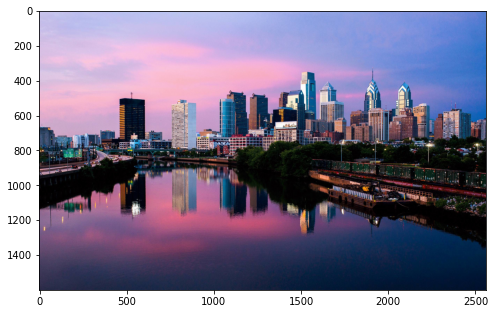

In [5]:
sky = img_as_float(io.imread("images/sky.jpeg"))

plt.figure(figsize=(8,8))
plt.imshow(sky)

### Add noise to image

In [6]:
noise = np.ones_like(sky) * 0.4 * (sky.max() - sky.min())
noise[np.random.random(size=sky.shape) > 0.7] *= -1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


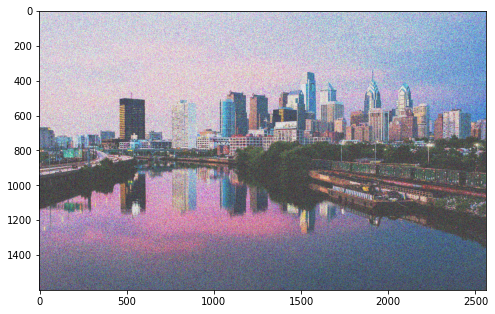

In [8]:
sky_noisy = sky + noise

plt.figure(figsize=(8,8))
plt.imshow(sky_noisy)

### Add absolute noise to image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


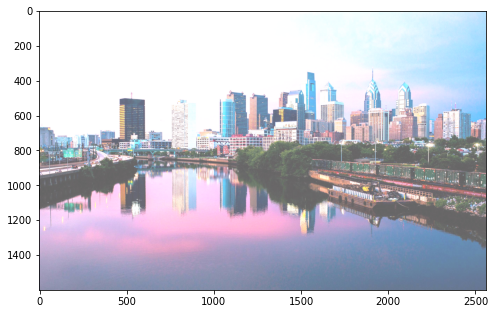

In [9]:
sky_noisy_constant = sky + abs(noise)

plt.figure(figsize=(8,8))
plt.imshow(sky_noisy_constant)

#### Function to calculate the mean square error (L2 distance) between images

In [11]:
def mse(x,y):
    return np.linalg.norm(x-y)

### Compare difference between images

In [21]:
# MSE (L2 distance)
mse_noise = mse(sky,sky_noisy)

# SSI
ssim_noise = structural_similarity(sky, 
                                   sky_noisy,
                                   multichannel = True,
                                   data_range = sky_noisy.max() - sky_noisy.min())

In [22]:
# MSE (L2 distance)
mse_constant = mse(sky,sky_noisy_constant)

# SSI
ssim_constant = structural_similarity(sky, 
                                   sky_noisy_constant,
                                   multichannel = True,
                                   data_range = sky_noisy_constant.max() - sky_noisy_constant.min())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Constant')

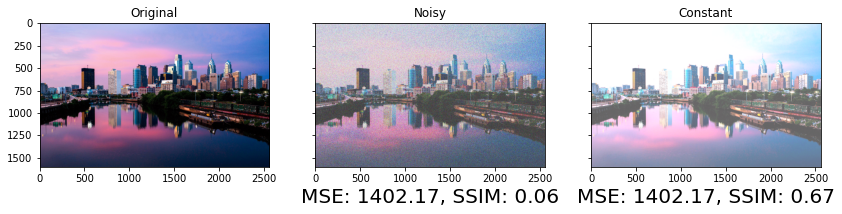

In [25]:
# plot the difference

fig, axes = plt.subplots(1,3,
                       figsize=(14,6),
                       sharex=True,sharey=True)

ax = axes.ravel()

label = 'MSE: {:.2f}, SSIM: {:.2f}'
ax[0].imshow(sky)
ax[1].set_xlabel("MSE:0, SSIM:1",fontsize=20)
ax[0].set_title('Original')

ax[1].imshow(sky_noisy)
ax[1].set_xlabel(label.format(mse_noise,ssim_noise),fontsize=20)
ax[1].set_title('Noisy')

ax[2].imshow(sky_noisy_constant)
ax[2].set_xlabel(label.format(mse_constant,ssim_constant),fontsize=20)
ax[2].set_title('Constant')